# Perusahaan Tambang OilyGiant

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Kesimpulan](#review_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Menghapus kolom data yang kurang relevan](#dataprep_1)
    * [2.2 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Split data dan train model](#analysis_1)
    * [3.2 Break-even volume untuk setiap sumur minyak](#analysis_2)
    * [3.3 Profit dari sumur terpilih dan prediksi model](#analysis_3)
    * [3.4 Profit dan risiko setiap wilayah](#analysis_3)
    * [3.5 Kesimpulan](#analysis_conclusion)

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

## Pendahuluan <a id='intro'></a>

Peneliti bekerja di perusahaan tambang OilyGiant. Peneliti bertugas untuk mencari tempat
terbaik untuk mengembangkan 200 titik sumur minyak baru.

Perusahaan Tambang OilyGiant memiliki data cadangan minyak di 3 wilayah, masing-masing 1 dataset untuk setiap wilayah. Kita akan melatih model Regresi Linier untuk masing-masing wilayah guna memprediksi volume yang dikandung dan menghitung pendapatan untuk setiap wilayah, serta menggunakan temuan tersebut untuk menentukan wilayah dengan profit margin tertinggi.

### Tujuan: 
Memilih wilayah dengan profit margin tertinggi.

### Tahapan
Peneliti memiliki data terkait wilayah yang akan diteliti dalam 3 *file* berikut:
- /datasets/geo_data_0.csv
- /datasets/geo_data_1.csv
- /datasets/geo_data_2.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis

[Kembali ke Daftar Isi](#back)


## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan

In [1]:
import pandas as pd #untuk mengelola dataframe
from sklearn.linear_model import LinearRegression #untuk mengolah model Linear Regression
from sklearn.model_selection import train_test_split #untuk melakukan split dataset
from sklearn.metrics import mean_squared_error #untuk melakukan penghitungan mean squared error
from scipy import stats as st #untuk melakukan penghitungan fungsi statistika
import numpy as np #untuk mengelola number array
import matplotlib.pyplot as plt #untuk menampilkan grafik

**Step 1.2**
Melakukan load data yang diperlukan dari file *geo_data_0.csv*, *geo_data_1.csv*, dan *geo_data_2.csv* kemudian menyimpannya ke
dalam dataframe data_0, data_1, dan data_2 

In [2]:
try:
    data_0 = pd.read_csv('geo_data_0.csv')
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
#membaca file geo_data_0.csv dan konversi ke dataframe data_0

try:
    data_1 = pd.read_csv('geo_data_1.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
#membaca file geo_data_1.csv dan konversi ke dataframe data_1

try:
    data_2 = pd.read_csv('geo_data_2.csv')
except:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
#membaca file geo_data_2.csv dan konversi ke dataframe data_2

**Step 1.3**
Melihat informasi umum dataset geo_data_0.csv

In [3]:
data_0.head() #melihat 5 baris awal data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info() #melihat informasi umum data_0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.isna().sum() #memeriksa missing value data_0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data_0.duplicated().sum() #memeriksa duplicated value data_0

0

**Step 1.4**
Melihat informasi umum dataset geo_data_1.csv

In [7]:
data_1.head() #melihat 5 baris awal data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data_1.info() #melihat informasi umum data_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.isna().sum() #memeriksa missing value data_1

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
data_1.duplicated().sum() #memeriksa duplicated value data_1

0

**Step 1.5**
Melihat informasi umum dataset geo_data_2.csv

In [11]:
data_2.head() #melihat 5 baris awal data_0

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
data_2.info() #melihat informasi umum data_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_2.isna().sum() #memeriksa missing value data_2

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
data_2.duplicated().sum() #memeriksa duplicated value data_2

0

Setelah dilakukan pemeriksaan dataset terkait, tidak ditemukan missing value dan duplicated value. Namun demikian, kolom id pada setiap data bersifat unik sehingga tidak terlalu membantu proses analisis, kolom ini akan kita hapus sebelum dilakukan analisis lebih lanjut.

### Kesimpulan <a name="review_conclusion"></a>

Data type kolom pada dataframe data_0, data_1, dan data_2 telah sesuai dan dapat diproses untuk analisis lebih lanjut. Untuk analisis lebih lanjut, terdapat kolom yang kurang relevan yang dapat didrop yakni id. Tidak terdapat missing value dan juga tidak terdapat duplicated value. 

[Kembali ke Daftar Isi](#back)

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

### Menghapus kolom data yang kurang relevan<a name="dataprep_1"></a>

Kolom data yang kurang relevan tersebut adalah id. Kolom id pada dasarnya merupakan gabungan karakter huruf dan angka yang bersifat unik dan sifatnya berbeda untuk setiap pengamatan. Kolom ini tidak akan membantu dalam proses train model sehingga kita dapat menghapus kolom ini.

**Step 2.1**
Menghapus kolom yang kurang relevan untuk train model.

In [15]:
data_0=data_0.drop(['id'], axis=1)
data_1=data_1.drop(['id'], axis=1)
data_2=data_2.drop(['id'], axis=1)
#menghapus kolom id dari dataframe data_0, data_1, dan data_2

data_0.info()
data_1.info()
data_2.info()
#melihat informasi umum tentang data_0, data_1, dan data_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

### Kesimpulan <a name="dataprep_conclusion"></a>

Telah dilakukan drop kolom yang kurang relevan yakni kolom id untuk seluruh data yang akan digunakan.

[Kembali ke Daftar Isi](#back)

## Tahap 3. Analisis <a name='analysis'></a>

## Split data dan train model <a name='analysis_1'></a>

Kolom produk akan menjadi target dan kolom lainnya akan menjadi feature.

Kita perlu membuat fungsi dengan 4 argumen untuk pemisahan data (feature train, target train, feature valid, target validi). Fungsi tersebut melakukan train model Regresi terhadap setiap dataset r dan mengembalikan nilai prediksi berikut nilai RMSE (Root Mean Square Error) dari model. Untuk selanjutnya, kita dapat melakukan split data terhadap setiap dataset dengan memanggil fungsi yang telah dibuat.

**Step 3.1**
Membuat fungsi untuk melakukan train model Regresi Linear.

In [16]:
def lr_model(f_train, f_valid, t_train, t_valid):
    #membuat fungsi yang memroses 4 data sebagai argument
    lr = LinearRegression().fit(f_train, t_train)
    #melakukan train model linear regression model menggunakan data set train
    t_pred = lr.predict(f_valid)
    #mendapatkan prediction dari model yang telah di-train untuk data feature valid
    rmse=(mean_squared_error(t_valid, t_pred))**0.5
    #menghitung nilai RMSE antara target valid dan nilai prediction
    return rmse, t_pred 
    #mengembalikan nilai RMSE dan nilai prediction

Sekarang kita dapat melakukan pemisahan dengan komposisi 75% set train, 25% set valid. Kita akan melakukan train model dengan meneruskan 4 item sebagai argument ke fungsi lr_model kita. Untuk selanjutnya kita mendapatkan nilai RMSE dan nilai rata-rata prediction.

**Step 3.2**
Menghitung nilai RMSE dan nilai rata-rata prediction untuk wilayah 0

In [17]:
features0=data_0.drop(['product'], axis=1)
#membentuk feature dengan menghapus kolom product
target0=data_0['product']
#membentuk target yang merupakan kolom product
f_train0, f_valid0, t_train0, t_valid0 = train_test_split(features0, target0, test_size=0.25, \
                                                          random_state=12345)
#melakukan split feature dan target dengan komposisi 75% untuk set train dan 25% untuk set valid
rmse0, pred0 = lr_model(f_train0, f_valid0, t_train0, t_valid0)
#meneruskan 4 item argument ke fungsi lr_model untuk mendapatkan nilai RMSE dan nilai prediction 
print('RMSE:', rmse0, '; Rata-rata predicted volume:', pred0.mean())
#mencetak nilai RMSE dan nilai rata-rata prediction 

RMSE: 37.5794217150813 ; Rata-rata predicted volume: 92.59256778438035


Untuk wilayah 0, nilai RMSE adalah sebesar 37.58 dan nilai rata-rata prediction adalah sebesar 92.59.

**Step 3.3**
Menghitung nilai RMSE dan nilai rata-rata prediction untuk wilayah 1

In [18]:
features1=data_1.drop(['product'], axis=1)
#membentuk feature dengan menghapus kolom product
target1=data_1['product']
#membentuk target yang merupakan kolom product
f_train1, f_valid1, t_train1, t_valid1 = train_test_split(features1, target1, test_size=0.25, \
                                                          random_state=12345)
#melakukan split feature dan target dengan komposisi 75% untuk set train dan 25% untuk set valid
rmse1, pred1 = lr_model(f_train1, f_valid1, t_train1, t_valid1)
#meneruskan 4 item argument ke fungsi lr_model untuk mendapatkan nilai RMSE dan nilai prediction 
print('RMSE:', rmse1, '; Rata-rata predicted volume:', pred1.mean())
#mencetak nilai RMSE dan nilai rata-rata prediction 

RMSE: 0.8930992867756167 ; Rata-rata predicted volume: 68.728546895446


Untuk wilayah 1 nilai RMSE adalah sebesar 0.89 dan nilai rata-rata prediction adalah sebesar 68.73.

**Step 3.4**
Menghitung nilai RMSE dan nilai rata-rata prediction untuk wilayah 0

In [19]:
features2=data_2.drop(['product'], axis=1)
#membentuk feature dengan menghapus kolom product
target2=data_2['product']
#membentuk target yang merupakan kolom product
f_train2, f_valid2, t_train2, t_valid2 = train_test_split(features2, target2, test_size=0.25, \
                                                          random_state=12345)
#melakukan split feature dan target dengan komposisi 75% untuk set train dan 25% untuk set valid
rmse2, pred2 = lr_model(f_train2, f_valid2, t_train2, t_valid2)
#meneruskan 4 item argument ke fungsi lr_model untuk mendapatkan nilai RMSE dan nilai prediction 
print('RMSE:', rmse2, '; Rata-rata predicted volume:', pred2.mean())
#mencetak nilai RMSE dan nilai rata-rata prediction 

RMSE: 40.02970873393434 ; Rata-rata predicted volume: 94.96504596800489


Untuk wilayah 2, nilai RMSE adalah sebesar 40.03 dan nilai rata-rata prediction adalah sebesar 94.96.

Model wilayah 1 adalah yang paling akurat karena memiliki nilai RMSE terkecil. Namun demikian wilayah 3 memiliki nilai rata-rata prediction terbesar.

## Break-even volume untuk setiap sumur minyak <a name='analysis_2'></a>

Informasi terkait proyek ini adalah sebagai berikut:
* Anggaran untuk pengembangan 200 sumur minyak adalah sebesar 100 USD juta
* Ketika menjelajahi wilayah-wilayah tersebut, dilakukan studi terhadap 500 titik dengan memilih 200 titik terbaik untuk perhitungan laba.
* Satu barel bahan mentah menghasilkan 4,5 USD pendapatan. Pendapatan dari satu unit produk adalah 4.500 dolar (volume cadangan minyak dalam ribuan barel).

Dengan investasi 100 juta untuk 200 sumur minyak, sebuah sumur minyak rata-rata harus menghasilkan  setidaknya 500 ribu USD untuk menghindari kerugian (hal ini setara dengan 111,1 unit).

Kita akan menyimpan informasi ini dalam variabel yang nantinya akan dapat digunakan pada saat menghitung profit. Guna mendapatkan volume yang cukup untuk mengembangkan sumur baru tanpa kerugian, kita perlu mencari biaya pengembangan sumur baru dan membaginya dengan pendapatan per volume.

**Step 3.5**
Analisis break-even volume

In [20]:
titik = 500
titik_utama = 200
budget_200 = 100000000
income_per_volume = 4500

biaya_sumur=budget_200/titik_utama
no_loss_volume=biaya_sumur / income_per_volume
print(no_loss_volume)

111.11111111111111


Hasilnya adalah 111.11 unit per product. Mari kita bandingkan dengan rata-rata dari 3 wilayah.

In [21]:
print('Rata-rata produksi Wilayah 0:', data_0['product'].mean())
print('Rata-rata produksi Wilayah 1:', data_1['product'].mean())
print('Rata-rata produksi Wilayah 2:', data_2['product'].mean())

Rata-rata produksi Wilayah 0: 92.50000000000001
Rata-rata produksi Wilayah 1: 68.82500000000002
Rata-rata produksi Wilayah 2: 95.00000000000004


Hasil penghitungan rata-rata produksi di seluruh wilayah lebih rendah dari nilai pada no-loss volume. Dapat dikatakan bahwa wilayah-wilayah tersebut menimbulkan kerugian.

## Profit dari sumur terpilih dan prediksi model <a name='analysis_3'></a>

Hal yang perlu dikerjakan:
* Tuliskan sebuah fungsi untuk menghitung profit dari sekumpulan sumur minyak terpilih dan prediksi modelnya, pilih 200 sumur dengan nilai prediksi tertinggi dari masing-masing 3 wilayah (file 'csv')
* Buat rangkuman tentang target volume pemesanan berdasarkan prediksi ini. Simpan prediksi untuk 200 sumur di masing-masing dari 3 wilayah

**Step 3.5**
Membuat fungsi revenue dengan argument target, prediction, dan jumlah sumur untuk menghitung profit.

In [22]:
def revenue(target, predicted, n):
    #membuat fungsi dengan argument target, prediction, dan jumlah sumur
    predicted = pd.Series(predicted)
    #konversi data prediction ke format series
    target = target.reset_index(drop=True)
    #reset index target
    indeks = predicted.sort_values(ascending=False).index
    #mengurutkan nilai prediction dalam urutan menurun dan mendapatkan nilai indeksnya
    return (target.loc[indeks][:n].sum() * income_per_volume) - (biaya_sumur * n)
    #mengembalikan nilai profit dengan memroses nilai target dan jumlah sumur

## Profit dan risiko setiap wilayah <a name="analysis_4"></a>

Kita akan menggunakan teknik bootstrapping untuk membuat sampel (1000 sampel untuk menemukan distribusi profit) dari target dan mengaitkannya dengan nilai prediksi masing-masing dan menghitung profit untuk 200 sumur dengan prediksi paling menguntungkan untuk setiap sampel, serta menyimpan semua nilai profit tersebut dalam sebuah list.

Perlu diingat bahwa saat menjelajahi wilayah, perlu dilakukan studi terhadap 500 titik dengan memilih 200 titik terbaik untuk perhitungan profit.

**Step 3.6**
Membuat fungsi rev_bootstr dengan argument target dan predictions.

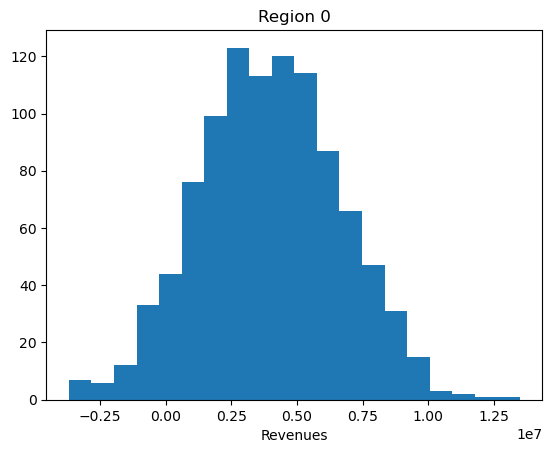

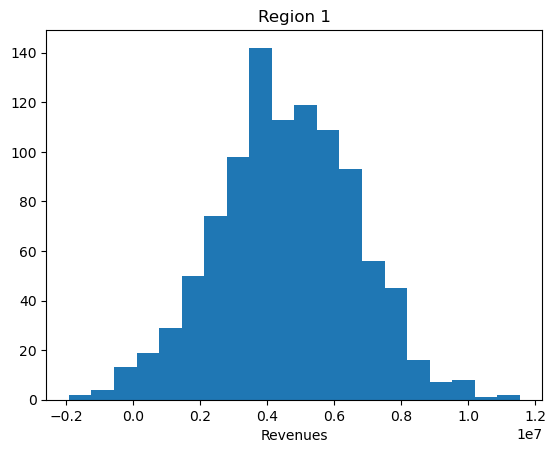

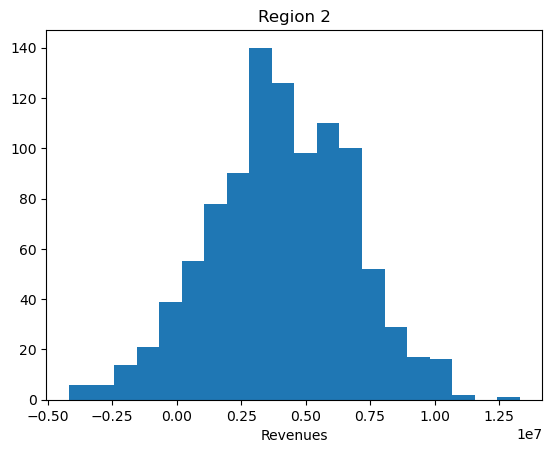

In [23]:
def rev_bootstr(target, predictions): 
#membuat fungsi dengan argument target dan prediction
    state = np.random.RandomState(12345) #mwngatur random state
    values = [] #membuat list kosong
    target = target.reset_index(drop=True) #reset index dari target
    
    #melakukan bootstrapping
    for i in range(1000): 
    #loop sebanyak 1000 kali
        target_sample = target.sample(n=titik, replace=True, random_state=state)
        #membuat target_sample dengan 500 titik
        pred_sample=predictions[target_sample.index]
        #membuat pred_sample yang diasosiasikan dengan nilai target sample
        values.append(revenue(target_sample, pred_sample, titik_utama))
        #menghitung pendapatan menggunakan fungsi revenue untuk 200 sumur
    return pd.Series(values) #mengembalikan list sebagai format series

revenues0 = rev_bootstr(t_valid0, pred0) #bootstrap untuk wilayah 0
revenues1 = rev_bootstr(t_valid1, pred1) #bootstrap untuk wilayah 1
revenues2 = rev_bootstr(t_valid2, pred2) #bootstrap untuk wilayah 2

plots = [revenues0, revenues1, revenues2] #list dari variabel bootstrap
titles = ['Region 0', 'Region 1', 'Region 2'] #list judul
for i in range(3):#loop dari 0 hingga 2
    plt.hist(plots[i], bins=20)#membuat grafik histogram dengan 20 bin
    plt.title(titles[i])#memberikan judul untuk grafik
    plt.xlabel('Revenues')#melabeli sumbu-x 'Revenues' pada grafik 
    plt.show()#menampilkan grafik

Kita dapat melihat bahwa semua wilayah secara umum menguntungkan meskipun terdapat beberapa wilayah yang mengalami kerugian. Untuk setiap wilayah, kita dapat menghitung selang kepercayaan 95%, rata-rata profit, dan risiko kerugian sebagai persentase. Kita mengharapkan wilayah-wilayah ini memiliki risiko kerugian lebih rendah dari 2,5%.

**Step 3.7**
Menghitung rata-rata profit, selang kepercayaan 95%, dan risiko kerugian untuk wilayah 0.

In [24]:
conf_interval = [revenues0.quantile(0.025), revenues0.quantile(0.975)]
#calculates the 95% confidence interval by getting the required percentiles
loss_risk = len(revenues0[revenues0 < 0]) / len(revenues0)
#calculates the risk of loss by dividing the number of losses by the total number of values from the 
#bootstrap result
print('Wilayah 0')
print('Rata-rata profit:', revenues0.mean()) 
print('Selang kepercayaan 95%:', conf_interval)
print('Risiko kerugian:', loss_risk)

Wilayah 0
Rata-rata profit: 3961649.8480237117
Selang kepercayaan 95%: [-1112155.4589049604, 9097669.41553423]
Risiko kerugian: 0.069


**Step 3.8**
Menghitung rata-rata profit, selang kepercayaan 95%, dan risiko kerugian untuk wilayah 1.

In [25]:
conf_interval = [revenues1.quantile(0.025), revenues1.quantile(0.975)]
loss_risk = len(revenues1[revenues1 < 0]) / len(revenues1)
print('Wilayah 1')
print('Rata-rata profit:', revenues1.mean()) 
print('Selang kepercayaan 95%:', conf_interval)
print('Risiko kerugian:', loss_risk)

Wilayah 1
Rata-rata profit: 4560451.057866608
Selang kepercayaan 95%: [338205.0939898458, 8522894.538660347]
Risiko kerugian: 0.015


**Step 3.9**
Menghitung rata-rata profit, selang kepercayaan 95%, dan risiko kerugian untuk wilayah 2.

In [26]:
conf_interval = [revenues2.quantile(0.025), revenues2.quantile(0.975)]
loss_risk = len(revenues2[revenues2 < 0]) / len(revenues2)
print('Wilayah 2')
print('Rata-rata profit:', revenues2.mean()) 
print('Selang kepercayaan 95%:', conf_interval)
print('Risiko kerugian:', loss_risk)

Wilayah 2
Rata-rata profit: 4044038.665683568
Selang kepercayaan 95%: [-1633504.1339559986, 9503595.749237997]
Risiko kerugian: 0.076


### Kesimpulan <a name="analysis_conclusion"></a>

Kita dapat menyimpulkan bahwa Wilayah 1 adalah wilayah yang terbaik untuk pengembangan sumur minyak baru karena memiliki risiko kerugian paling kecil (1,5%) dan rata-rata profit terbesar 4560451.057866608 dengan batas selang kepercayaan 95% batas bawah 338205.0939898458 dan batas atas 8522894.538660347 .

## Temuan <a name="end"></a>
* Kita telah melakukan train model Regresi Linier untuk data dari 3 wilayah
* Kita menemukan bahwa satuan 111,11 unit volume cukup untuk membuat sebuah sumur untuk tidak mengalami kerugian
* Kita telah melakukan bootstrap nilai target dengan membuat sampel sebanyak 500 nilai dan menggunakan nilai prediksi yang sesuai untuk menghitung nilai profit untuk 200 titik utama.
* Dengan menggunakan bootstraps, kita telah menghitung selang kepercayaan, rata-rata profit, dan risiko kerugian. Kita akhirnya menyimpulkan bahwa Wilayah 1 adalah yang terbaik untuk pengembangan sumur minyak baru karena memiliki risiko kerugian paling kecil (1,5%) dan rata-rata profit terbesar 4560451.057866608 dengan batas selang kepercayaan 95% batas bawah 338205.0939898458 dan batas atas 8522894.538660347 .

[Kembali ke Daftar Isi](#back)